In [1]:
#plot DP, GQ and VAF/AB to select hard filters
import hail as hl
import pyspark
from hail.plot import show
hl.plot.output_notebook()

from bokeh.plotting import output_file, save, reset_output

sc = pyspark.SparkContext()
tmp_dir = "hdfs://spark-master:9820/"
mtdir = "file:///lustre/scratch123/qc/matrixtables/"
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference="GRCh38")

Loading BokehJS ...

2022-09-15 12:41:45 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/backend/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/backend/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 3.1.2
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.88-7d39379870da
LOGGING: writing to /home/ubuntu/jupyter/hail-20220915-1241-0.2.88-7d39379870da.log


In [2]:
mtfile = mtdir + "mt_after_var_qc.mt"
mt = hl.read_matrix_table(mtfile)
mt.entries().show()

2022-09-15 12:42:49 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'


+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh38> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+----------------------+----------------+
| info.AF        | info.AN | info.AS_BaseQRankSum | info.AS_FS     |
+----------------+---------+----------------------+----------------+
| array<float64> |   int32 | array<float64>       | array<float64> |
+----------------+---------+----------------------+----------------+
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
+----------------+---------+----------------------+----------------+

+-------------------------+----------------+-------------------+
| info.AS_InbreedingCoeff | info.AS_MQ     | info.AS_MQRankSum |
+-------------------------+----------------+-------------------+
| array<float64>          | array<float64> | array<float64>    |
+-------------------------+----------------+-------------------+
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
+-------------------------+----------------+-------------------+

+----------------+--------------------------+----------------+
| info.AS_QD     | info.AS_RAW_BaseQRankSum | info.AS_RAW_MQ |
+----------------+--------------------------+----------------+
| array<float64> | str                      | str            |
+----------------+--------------------------+----------------+
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA  

In [10]:
#annotate with VAF - this is the same as HetAB for hets but will also be 1 for homs
mt = mt.annotate_entries(vaf = mt.AD[1]/hl.sum(mt.AD))
mt.entries().show()

+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh38> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
| chr1:68950    | ["C","A"]  | NA   | 1.05e+02 | NA       | [1]          |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+----------------------+----------------+
| info.AF        | info.AN | info.AS_BaseQRankSum | info.AS_FS     |
+----------------+---------+----------------------+----------------+
| array<float64> |   int32 | array<float64>       | array<float64> |
+----------------+---------+----------------------+----------------+
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
| [3.34e-05]     |   29946 | [-1.00e+00]          | [0.00e+00]     |
+----------------+---------+----------------------+----------------+

+-------------------------+----------------+-------------------+
| info.AS_InbreedingCoeff | info.AS_MQ     | info.AS_MQRankSum |
+-------------------------+----------------+-------------------+
| array<float64>          | array<float64> | array<float64>    |
+-------------------------+----------------+-------------------+
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
| [3.42e-01]              | [2.50e+01]     | [0.00e+00]        |
+-------------------------+----------------+-------------------+

+----------------+--------------------------+----------------+
| info.AS_QD     | info.AS_RAW_BaseQRankSum | info.AS_RAW_MQ |
+----------------+--------------------------+----------------+
| array<float64> | str                      | str            |
+----------------+--------------------------+----------------+
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA                       | NA             |
| [2.54e+01]     | NA  

In [15]:
p = hl.plot.histogram(mt.DP, range=(0,60), bins=60, title='DP Histogram', legend='DP')
show(p)

In [16]:
p = hl.plot.histogram(mt.GQ, title='GQ Histogram', legend='GQ')
show(p)

In [18]:
#het allele balance won't display hom ref calls (VAF = 0) which will dwarf this, or hom alt (VAF = 1)
p = hl.plot.histogram(mt.HetAB, title='HetAB Histogram', legend='HetAB')
show(p)

In [2]:
#plot DP, GQ and AB after filtering
mtfile = mtdir + "mt_after_var_qc_hard_filter_gt.mt"
mt = hl.read_matrix_table(mtfile)
mt.entries().show()

2022-09-14 07:18:53 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'


+---------------+------------+---------------+----------+----------+
| locus         | alleles    | rsid          |     qual | filters  |
+---------------+------------+---------------+----------+----------+
| locus<GRCh38> | array<str> | str           |  float64 | set<str> |
+---------------+------------+---------------+----------+----------+
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
+---------------+------------+---------------+----------+----------+

+--------------+----------------+---------+----------------------+
| info.AC      | info.AF        | info.AN | info.AS_BaseQRankSum |
+--------------+----------------+---------+----------------------+
| array<int32> | array<float64> |   int32 | array<float64>       |
+--------------+----------------+---------+----------------------+
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
+--------------+----------------+---------+----------------------+

+----------------+-------------------------+----------------+
| info.AS_FS     | info.AS_InbreedingCoeff | info.AS_MQ     |
+----------------+-------------------------+----------------+
| array<float64> | array<float64>          | array<float64> |
+----------------+-------------------------+----------------+
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
+----------------+-------------------------+----------------+

+-------------------+----------------+--------------------------+
| info.AS_MQRankSum | info.AS_QD     | info.AS_RAW_BaseQRankSum |
+-------------------+----------------+--------------------------+
| array<float64>    | array<float64> | str                      |
+-------------------+----------------+--------------------------+
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     

In [3]:
p = hl.plot.histogram(mt.DP, range=(0,60), bins=60, title='DP Histogram', legend='DP')
show(p)

In [4]:
p = hl.plot.histogram(mt.GQ,  title='GQ Histogram', legend='GQ')
show(p)

In [5]:
p = hl.plot.histogram(mt.HetAB, title='HetAB Histogram', legend='HetAB')
show(p)

In [3]:
#mutation spectra
mtfile = mtdir + "mt_after_var_qc.mt"
mt_pre_filter = hl.read_matrix_table(mtfile)

In [4]:
mtfile = mtdir + "mt_after_var_qc_hard_filter_gt.mt"
mt = hl.read_matrix_table(mtfile)
mt.entries().show()

+---------------+------------+---------------+----------+----------+
| locus         | alleles    | rsid          |     qual | filters  |
+---------------+------------+---------------+----------+----------+
| locus<GRCh38> | array<str> | str           |  float64 | set<str> |
+---------------+------------+---------------+----------+----------+
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
+---------------+------------+---------------+----------+----------+

+--------------+----------------+---------+----------------------+
| info.AC      | info.AF        | info.AN | info.AS_BaseQRankSum |
+--------------+----------------+---------+----------------------+
| array<int32> | array<float64> |   int32 | array<float64>       |
+--------------+----------------+---------+----------------------+
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
+--------------+----------------+---------+----------------------+

+----------------+-------------------------+----------------+
| info.AS_FS     | info.AS_InbreedingCoeff | info.AS_MQ     |
+----------------+-------------------------+----------------+
| array<float64> | array<float64>          | array<float64> |
+----------------+-------------------------+----------------+
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
+----------------+-------------------------+----------------+

+-------------------+----------------+--------------------------+
| info.AS_MQRankSum | info.AS_QD     | info.AS_RAW_BaseQRankSum |
+-------------------+----------------+--------------------------+
| array<float64>    | array<float64> | str                      |
+-------------------+----------------+--------------------------+
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     

In [7]:
mt_pre_filter_snp = mt_pre_filter.filter_rows(hl.is_snp(mt_pre_filter.alleles[0], mt_pre_filter.alleles[1]))
pre_filter_counts = mt_pre_filter_snp.aggregate_rows(hl.agg.counter(hl.Struct(ref=mt_pre_filter_snp.alleles[0], alt=mt_pre_filter_snp.alleles[1])))

In [8]:
pre_filter_counts

frozendict({Struct(ref='A', alt='C'): 103358, Struct(ref='A', alt='G'): 363152, Struct(ref='A', alt='T'): 83364, Struct(ref='C', alt='A'): 328899, Struct(ref='C', alt='G'): 181516, Struct(ref='C', alt='T'): 808785, Struct(ref='G', alt='A'): 808648, Struct(ref='G', alt='C'): 180404, Struct(ref='G', alt='T'): 326176, Struct(ref='T', alt='A'): 83926, Struct(ref='T', alt='C'): 361277, Struct(ref='T', alt='G'): 103540})

In [9]:
mt_post_filter_snp = mt.filter_rows(hl.is_snp(mt.alleles[0], mt.alleles[1]))
post_filter_counts = mt_post_filter_snp.aggregate_rows(hl.agg.counter(hl.Struct(ref=mt_post_filter_snp.alleles[0], alt=mt_post_filter_snp.alleles[1])))
post_filter_counts

frozendict({Struct(ref='A', alt='C'): 90389, Struct(ref='A', alt='G'): 330324, Struct(ref='A', alt='T'): 71906, Struct(ref='C', alt='A'): 145957, Struct(ref='C', alt='G'): 166929, Struct(ref='C', alt='T'): 761718, Struct(ref='G', alt='A'): 761434, Struct(ref='G', alt='C'): 166438, Struct(ref='G', alt='T'): 145523, Struct(ref='T', alt='A'): 72197, Struct(ref='T', alt='C'): 328432, Struct(ref='T', alt='G'): 90352})

In [12]:
pre_filter_counts_dict = dict(pre_filter_counts)
post_filter_counts_dict = dict(post_filter_counts)

In [13]:
allsubs = ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G']
pre_filter_subs = []
post_filter_subs = []
for i in range(0, len(allsubs)):
    pre_filter_subs.append(pre_filter_counts_dict[list(pre_filter_counts_dict.keys())[i]])
    post_filter_subs.append(post_filter_counts_dict[list(post_filter_counts_dict.keys())[i]])
    
pre_filter_subs

[103358,
 363152,
 83364,
 328899,
 181516,
 808785,
 808648,
 180404,
 326176,
 83926,
 361277,
 103540]

In [14]:
post_filter_subs

[90389,
 330324,
 71906,
 145957,
 166929,
 761718,
 761434,
 166438,
 145523,
 72197,
 328432,
 90352]

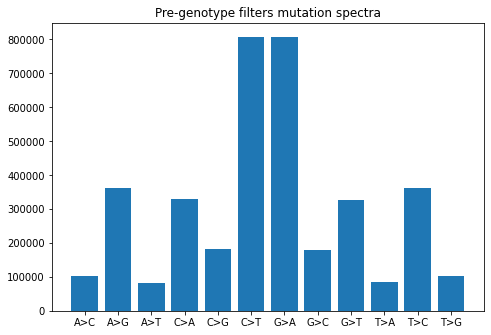

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6,4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,pre_filter_subs)
plt.title("Pre-genotype filters mutation spectra")
plt.show()

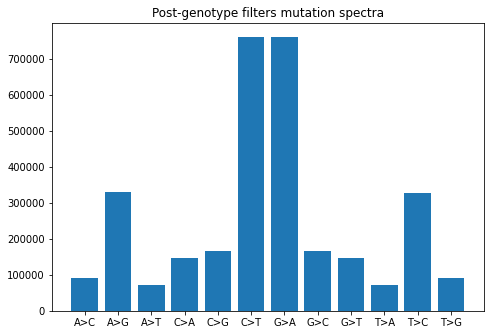

In [16]:
plt.rcParams["figure.figsize"] = (6,4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,post_filter_subs)
plt.title("Post-genotype filters mutation spectra")
plt.show()

In [32]:
gnomadht.filter(gnomadht.n_alt_alleles > 1).show()

+---------------+---------------+----------------------------+----------------+
| locus         | alleles       | ReverseComplementedAlleles | SwappedAlleles |
+---------------+---------------+----------------------------+----------------+
| locus<GRCh38> | array<str>    |                       bool |           bool |
+---------------+---------------+----------------------------+----------------+
| chr1:12599    | ["CT","C"]    |                      False |          False |
| chr1:13372    | ["G","C"]     |                      False |          False |
| chr1:13372    | ["G","T"]     |                      False |          False |
| chr1:13385    | ["G","A"]     |                      False |          False |
| chr1:13385    | ["G","T"]     |                      False |          False |
| chr1:13404    | ["G","C"]     |                      False |          False |
| chr1:13404    | ["G","T"]     |                      False |          False |
| chr1:13416    | ["C","CAGAG"] |                      False |          False |
| chr1:13416    | ["C","CTGAG"] |                      False |          False |
| chr1:13417    | ["C","A"]     |                      False |          False |
+---------------+---------------+----------------------------+----------------+

+----------------+
| original_locus |
+----------------+
| locus<GRCh37>  |
+----------------+
| 1:12599        |
| 1:13372        |
| 1:13372        |
| 1:13385        |
| 1:13385        |
| 1:13404        |
| 1:13404        |
| 1:13416        |
| 1:13416        |
| 1:13417        |
+----------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int32}>    |
+------------------------------------------------------------------------------+
| [(0,0.00e+00,2830,0),(1,2.18e-05,45864,0),(0,0.00e+00,576,0),(0,0.00e+00,... |
| [(11,9.91e-05,110972,1),(16,8.52e-05,187842,1),(0,0.00e+00,42446,0),(0,0.... |
| [(1,9.01e-06,110972,0),(6,3.19e-05,187842,1),(0,0.00e+00,42446,0),(0,0.00... |
| [(0,0.00e+00,94820,0),(2,1.17e-05,170264,0),(0,0.00e+00,36132,0),(0,0.00e... |
| [(0,0.00e+00,94820,0),(2,1.17e-05,170264,0),(0,0.00e+00,36132,0),(0,0.00e... |
| [(1,1.48e-05,67578,0),(1,6.71e-06,149136,0),(1,3.91e-05,25604,0),(0,0.00e... |
| [(1,1.48e-05,67578,0),(2,1.34e-05,149136,0),(0,0.00e+00,25604,0),(0,0.00e... |
| [(0,0.00e+00,63474,0),(1,6.72e-06,148812,0),(0,0.00e+00,24572,0),(0,0.00e... |
| [(0,0.00e+00,63474,0),(3,2.02e-05,148812,0),(0,0.00e+00,24572,0),(0,0.00e... |
| [(1,1.50e-05,66712,0),(7,4.54e-05,154140,1),(1,4.04e-05,24774,0),(0,0.00e... |
+------------------------------------------------------------------------------+

+------------------------------------------------------------------------------+
| age_hist_het                                                                 |
+------------------------------------------------------------------------------+
| array<struct{bin_edges: array<float64>, bin_freq: array<int64>, n_smaller... |
+------------------------------------------------------------------------------+
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e+01,6.50e+0... |
| [([3.00e+01,3.50e+01,4.00e+01,4.50e+01,5.00e+01,5.50e+01,6.00e